# データマイニング最終課題

## アワビの性別データセットをK-NNで実装

### データセットヘッダー

-----------------------------
Sex / nominal / -- / M=0, F=1, and I=2 (infant)<br>
Length / continuous / mm / Longest shell measurement<br>
Diameter / continuous / mm / perpendicular to length<br>
Height / continuous / mm / with meat in shell<br>
WholeWeight / continuous / grams / whole abalone<br>
ShuckedWeight / continuous / grams / weight of meat<br>
VisceraWeight / continuous / grams / gut weight (after bleeding)<br>
ShellWeight / continuous / grams / after being dried<br>
Rings / integer / -- / +1.5 gives the age in years<br>

In [158]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [159]:
init_df = pd.read_csv('data/abalone.data')
init_df

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [160]:
# アワビデータセットをdataframeで読み込む
abalone_target_data = pd.DataFrame(init_df, columns=['Sex'])
iris_df = pd.DataFrame(init_df.values.tolist(), columns=init_df.columns)

X_train, X_test, Y_train, Y_test = train_test_split(
    iris_df,
    abalone_target_data,
    test_size=0.1,
    train_size=0.9
)

In [161]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train, Y_train)

/Users/yuuiri/PycharmProjects/college/venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=6)

In [162]:
Y_pred = knn_model.predict(X_test)
print(metrics.accuracy_score(Y_test, Y_pred))

0.9976076555023924


/Users/yuuiri/PycharmProjects/college/venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/yuuiri/PycharmProjects/college/venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/yuuiri/PycharmProjects/college/venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/yuuiri/PycharmProjects/college/venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConv

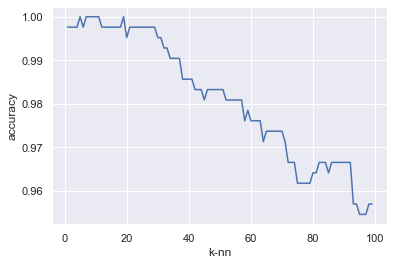

In [163]:
accuracy_list = []
sns.set()
k_range = range(1, 100)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracy_list.append(metrics.accuracy_score(Y_test, Y_pred))

figure = plt.figure()
ax = figure.add_subplot(111)
ax.plot(k_range, accuracy_list)
ax.set_xlabel('k-nn')
ax.set_ylabel('accuracy')
plt.show()
